60000  train samples
10000  test samples
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 784)               0         
_________________________________________________________________
encoder (Dense)              (None, 32)                25120     
_________________________________________________________________
decoder (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.3076 - val_loss: 0.2553
Epoch 2/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.2355 - val_loss: 0.2151
Epoch 3/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.204

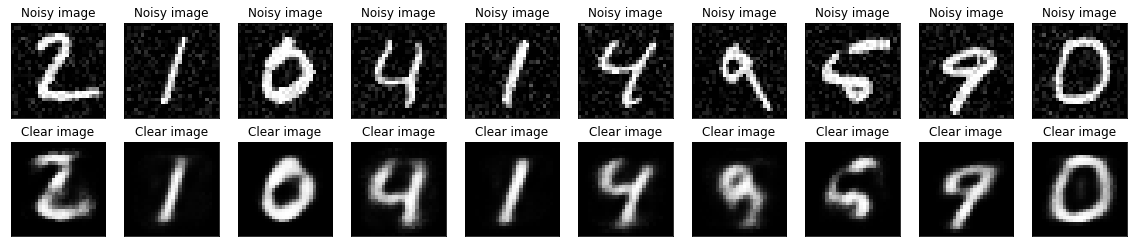

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import (Input, Dense)

# Load data
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28                          
input_shape = (img_rows * img_cols, )

# the data, shuffled and split between train and test sets
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

noise_factor = 0.1

x_train_noisy = x_train + noise_factor * np.random.randn(x_train.shape[0], img_rows * img_cols)
x_test_noisy = x_test + noise_factor * np.random.randn(x_test.shape[0], img_rows * img_cols)
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

print(x_train.shape[0], ' train samples')
print(x_test.shape[0], ' test samples')
    
def AE(features_shape):

    # Input
    x = Input(name='inputs', shape=features_shape, dtype='float32')
    o = x
    
    # Encoder
    enc = Dense(32, activation='relu', name='encoder')(o)
    
    # Decoder
    dec = Dense(features_shape[0], activation='sigmoid', name='decoder')(enc)
    
    # Print network summary
    Model(inputs=x, outputs=dec).summary()
    
    return Model(inputs=x, outputs=dec)

batch_size = 128
epochs = 10

autoenc = AE(input_shape)
autoenc.compile(optimizer='adadelta', loss='binary_crossentropy')

autoenc.fit(x_train_noisy, x_train, epochs=epochs, batch_size=batch_size,
            shuffle=True, validation_data=(x_test_noisy, x_test))

decoded_imgs = autoenc.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n+1):
    # display original
    ax = plt.subplot(2, n, i)
    
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.title('Noisy image')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.title('Clear image')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

60000  train samples
10000  test samples
Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 784)               0         
_________________________________________________________________
encoder (Dense)              (None, 32)                25120     
_________________________________________________________________
decoder (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.2978 - val_loss: 0.2631
Epoch 2/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.2547 - val_loss: 0.2417
Epoch 3/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.23

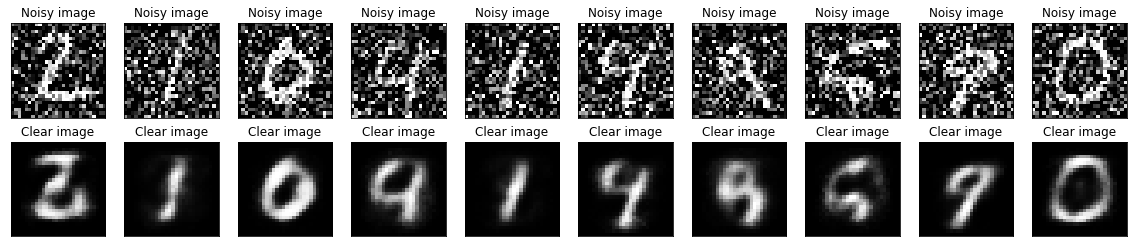

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import (Input, Dense)

# Load data
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28                          
input_shape = (img_rows * img_cols, )

# the data, shuffled and split between train and test sets
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

noise_factor = 0.5

x_train_noisy = x_train + noise_factor * np.random.randn(x_train.shape[0], img_rows * img_cols)
x_test_noisy = x_test + noise_factor * np.random.randn(x_test.shape[0], img_rows * img_cols)
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

print(x_train.shape[0], ' train samples')
print(x_test.shape[0], ' test samples')
    
def AE(features_shape):

    # Input
    x = Input(name='inputs', shape=features_shape, dtype='float32')
    o = x
    
    # Encoder
    enc = Dense(32, activation='relu', name='encoder')(o)
    
    # Decoder
    dec = Dense(features_shape[0], activation='sigmoid', name='decoder')(enc)
    
    # Print network summary
    Model(inputs=x, outputs=dec).summary()
    
    return Model(inputs=x, outputs=dec)

batch_size = 128
epochs = 10

autoenc = AE(input_shape)
autoenc.compile(optimizer='adadelta', loss='binary_crossentropy')

autoenc.fit(x_train_noisy, x_train, epochs=epochs, batch_size=batch_size,
            shuffle=True, validation_data=(x_test_noisy, x_test))

decoded_imgs = autoenc.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n+1):
    # display original
    ax = plt.subplot(2, n, i)
    
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.title('Noisy image')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.title('Clear image')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

60000  train samples
10000  test samples
Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 784)               0         
_________________________________________________________________
encoder (Dense)              (None, 32)                25120     
_________________________________________________________________
decoder (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.2909 - val_loss: 0.2644
Epoch 2/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.2631 - val_loss: 0.2605
Epoch 3/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.25

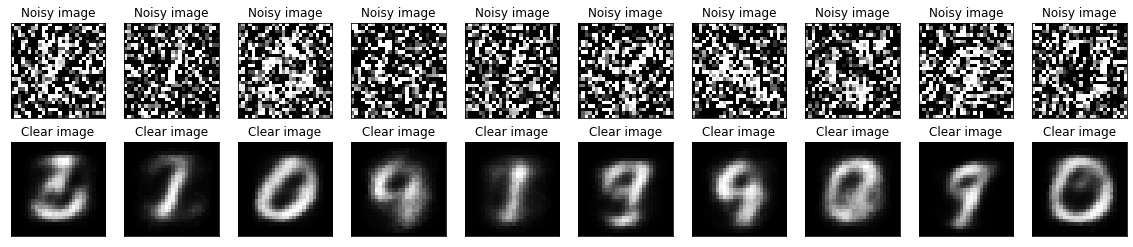

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import (Input, Dense)

# Load data
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28                          
input_shape = (img_rows * img_cols, )

# the data, shuffled and split between train and test sets
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

noise_factor = 1.0

x_train_noisy = x_train + noise_factor * np.random.randn(x_train.shape[0], img_rows * img_cols)
x_test_noisy = x_test + noise_factor * np.random.randn(x_test.shape[0], img_rows * img_cols)
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

print(x_train.shape[0], ' train samples')
print(x_test.shape[0], ' test samples')
    
def AE(features_shape):

    # Input
    x = Input(name='inputs', shape=features_shape, dtype='float32')
    o = x
    
    # Encoder
    enc = Dense(32, activation='relu', name='encoder')(o)
    
    # Decoder
    dec = Dense(features_shape[0], activation='sigmoid', name='decoder')(enc)
    
    # Print network summary
    Model(inputs=x, outputs=dec).summary()
    
    return Model(inputs=x, outputs=dec)

batch_size = 128
epochs = 10

autoenc = AE(input_shape)
autoenc.compile(optimizer='adadelta', loss='binary_crossentropy')

autoenc.fit(x_train_noisy, x_train, epochs=epochs, batch_size=batch_size,
            shuffle=True, validation_data=(x_test_noisy, x_test))

decoded_imgs = autoenc.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n+1):
    # display original
    ax = plt.subplot(2, n, i)
    
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.title('Noisy image')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.title('Clear image')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()